# 1-3 마켓과 머신러닝

## Bream and Smelt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%pip install koreanize-matplotlib

import koreanize_matplotlib

Note: you may need to restart the kernel to use updated packages.


도미 데이터

In [3]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

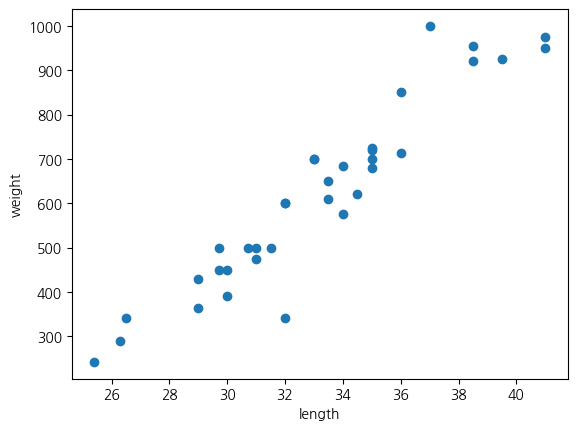

In [5]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

빙어 데이터 

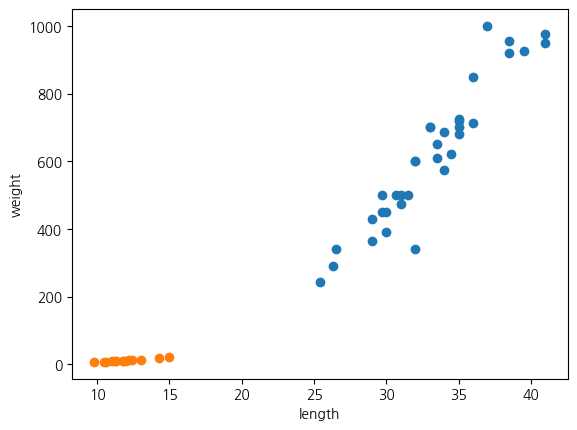

In [7]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

도미와 빙어 합치기

### 첫번째 머신러닝 프로그램 
k-nearest neighbors

In [9]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

리스트 내포 zip()

In [15]:
fish_data = [[l,w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [18]:
fish_target = [1]*35 + [0]*14  # [1]은 리스트
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()      # kn이 모델임
kn.fit(fish_data, fish_target)   # 주어진 데이터로 알고리즘 훈련
kn.score(fish_data, fish_target) # 얼마나 잘 훈련되었는지 평가, 0~1 값 반환

1.0

새로운 데이터

In [22]:
kn.predict([[30, 600]])  #샘플 데이터도 2차원 데이터로 넣어야함어야함

array([1])

In [ ]:
print(kn._fit_X)

In [26]:
kn49 = KNeighborsClassifier(n_neighbors=49)  #모델이 전체 데이터(49개)를 사용해 분류를 결정->전체 데이터에서 다수의 클래스 선택 
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

# K값이 너무 크면 -> 모델은 실제로 중요한 "최근접 이웃" 대신 전체 데이터의 분포에 의존 / 이로 인해 항상 다수 클래스로 분류하게 됨 

0.7142857142857143

In [28]:
print(35/49)

0.7142857142857143
